In [3]:
import numpy as np                     # Numerical algorithms on arrays
import cv2                             # OpenCV
from matplotlib import pyplot as plt   # Plot library
import matplotlib.cm as cm             # Image color map 
import tools                           # A few helpers to plot multiple images
from PIL import Image                  # For rescaling images
from ipywidgets import interact, fixed # Interact with images

In [4]:
# Load image in grayscale format
road = cv2.imread('images/Road.png', cv2.IMREAD_GRAYSCALE)
building = cv2.imread('images/Building.png', cv2.IMREAD_GRAYSCALE)

road_color = cv2.imread('images/Road.png', cv2.IMREAD_COLOR)
building_color = cv2.imread('images/Building.png', cv2.IMREAD_COLOR)

In [8]:
# Show images
cv2.imshow('Color road displayed in grayscale', road)
cv2.imshow('Color building displayed in grayscale', building)

cv2.waitKey(0)

cv2.destroyAllWindows()

NameError: name 'road' is not defined

In [12]:
# rescaling road

basewidth = 100
road_img = Image.open('Images/Road.png')
wpercent = (basewidth/float(road_img.size[0]))
hsize = int((float(road_img.size[1])*float(wpercent)))
resc_road = road_img.resize((basewidth,hsize), Image.ANTIALIAS)
resc_road.save('rescale_road.png', quality = 95)


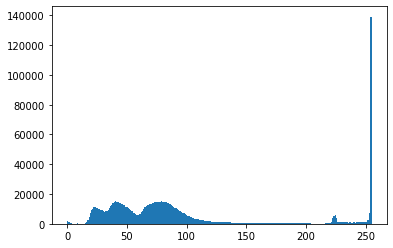

In [13]:
#histogram

import matplotlib.cm as cm

gray_road = cv2.imread( 'Images/Road.png', cv2.IMREAD_GRAYSCALE)

hist_np, bins = np.histogram( gray_road.ravel(),256,[0,256])

hist_cv = cv2.calcHist( [gray_road],[0],None,[256],[0,256])

# Plot an histogram with matplotlib
%matplotlib inline
plt.hist(gray_road.ravel(), bins=256, range=(0,255))
plt.show()

In [14]:
img = cv2.imread( 'Images/road.png', cv2.IMREAD_GRAYSCALE)

def update(omega=10, sigma_color=20, sigma_space=50):
    img_bilat = cv2.bilateralFilter( img, omega, sigma_color, sigma_space)

    tools.multiPlot( 1, 2, ( img, img_bilat), ( 'Original image', 'Bilateral filtering'),
                       cmap_tuple=( cm.gray, cm.gray))

interact(update, omega = [1, 5, 10, 20, 30] , sigma_color = (10, 250, 10), sigma_space=(10,250,10))

interactive(children=(Dropdown(description='omega', index=2, options=(1, 5, 10, 20, 30), value=10), IntSlider(…

<function __main__.update(omega=10, sigma_color=20, sigma_space=50)>

In [ ]:
threshVal = 70
img = cv2.imread( 'Images/road.png', cv2.IMREAD_GRAYSCALE)
gray_road = cv2.bilateralFilter( img, 9, 80, 80)
ret, thresh1 = cv2.threshold( gray_road, threshVal, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold( gray_road, threshVal, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold( gray_road, threshVal, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold( gray_road, threshVal, 255, cv2.THRESH_TOZERO)
#ret, thresh5 = cv2.threshold( gray_road, threshVal, 255, cv2.THRESH_TOZERO_INV)
thresh5 = cv2.adaptiveThreshold(gray_road, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 3
                               )

tools.multiPlot( 2, 3, ( gray_road, thresh1, thresh2, thresh3, thresh4, thresh5),
                       ( 'Original Image', 'THRESH_BINARY', 'THRESH_BINARY_INV',
                        'THRESH_TRUNC', 'THRESH_TOZERO', 'adaptive'),
                        cmap_tuple=( cm.gray, cm.gray, cm.gray, cm.gray, cm.gray, cm.gray))


In [ ]:
# Canny

#img = cv2.imread( 'Images/Road.png', cv2.IMREAD_GRAYSCALE)
img = cv2.imread( 'Images/Building.png', cv2.IMREAD_GRAYSCALE)

def update( lo_thresh=80, hi_thresh=180, sobel_size=3):
    img_canny = cv2.Canny( img, lo_thresh, hi_thresh, apertureSize=sobel_size, L2gradient=True)

    tools.multiPlot( 1, 2, ( img, img_canny),
                     ( 'Original image', 'Canny'),
                     cmap_tuple=( cm.gray, cm.gray))

interact(update, lo_thresh = (10, 150, 10), hi_thresh = (120, 240, 10), sobel_size= [3, 5, 7])

# best = lo_thresh = 90, hi_tresh = 150 , sobel size = 3

In [ ]:
# HOUGH

minLineLength = 1
maxLineGap = 20
sobel_size = 3
img = cv2.imread( 'Images/rescale_road.png', cv2.IMREAD_GRAYSCALE)
img_canny = cv2.Canny(img, 90, 150 , apertureSize=sobel_size, L2gradient=True)
lines = cv2.HoughLinesP(img_canny,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),3)

cv2.imwrite('houghlines5.png',img)

tools.multiPlot( 1, 2, ( img, img_canny),
                     ( 'Original image', 'Canny'),
                     cmap_tuple=( cm.gray, cm.gray))


In [ ]:
#Hough lines 2

img = cv2.imread( 'Images/rescale_road.png', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img, 90, 150 , apertureSize=7, L2gradient=True)

lines = cv2.HoughLines(edges,1,np.pi/180,2)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(255,0,0),3)

cv2.imwrite('houghlines3.jpg',img)

tools.multiPlot( 1, 2, ( img, edges),
                     ( 'Original image', 'Canny'),
                     cmap_tuple=( cm.gray, cm.gray))

In [ ]:
%matplotlib inline

cameraman_threshold = gray_road > 150
plt.imshow(cameraman_threshold, cmap="gray")
plt.show()

In [11]:
def update( lo_thresh=80, hi_thresh=180, sobel_size=3):
    img_canny = cv2.Canny( thresh5, lo_thresh, hi_thresh, apertureSize=sobel_size, L2gradient=True)

    tools.multiPlot( 1, 2, ( img, img_canny),
                     ( 'Original image', 'Canny'),
                     cmap_tuple=( cm.gray, cm.gray))

interact(update, lo_thresh = (10, 150, 10), hi_thresh = (120, 240, 10), sobel_size= [3, 5, 7])

interactive(children=(IntSlider(value=80, description='lo_thresh', max=150, min=10, step=10), IntSlider(value=…

<function __main__.update(lo_thresh=80, hi_thresh=180, sobel_size=3)>

In [ ]:
minLineLength = 1
maxLineGap = 20
sobel_size = 3
img = cv2.imread( 'Images/rescale_road.png', cv2.IMREAD_GRAYSCALE)
img_canny = cv2.Canny(thresh5, 90, 150 , apertureSize=sobel_size, L2gradient=True)

lines = cv2.HoughLinesP(img_canny,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),10)

cv2.imwrite('houghlines5.png',img)

tools.multiPlot( 1, 2, ( img, img_canny),
                     ( 'Original image', 'Canny'),
                     cmap_tuple=( cm.gray, cm.gray))

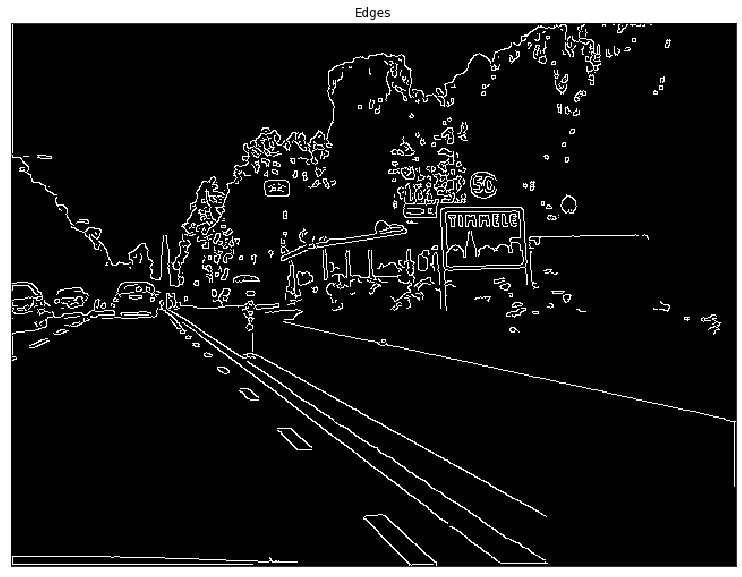

In [15]:
# prefiltrering and scaling 

#img = cv2.imread( 'Images/Pattern_inspection2.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread( 'Images/Building.png', cv2.IMREAD_GRAYSCALE)
img = cv2.imread( 'Images/Road.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread( 'Images/1_HQ00020.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread( 'Images/image.000078.png', cv2.IMREAD_GRAYSCALE)

iGausKernelSize = 11
imgFilt = cv2.GaussianBlur( img, ( iGausKernelSize, iGausKernelSize), 0)

iReducFactor = 2
iStart = iReducFactor // 2
imgReduc = imgFilt[iStart::iReducFactor, iStart::iReducFactor]
   
# compute the median of the single channel pixel intensities
med = np.median( imgReduc)
 
# apply automatic Canny edge detection using the computed median
sigma = 0.3
loThreshold = int( max( 0, (1.0 - sigma) * med))
hiThreshold = int( min( 255, (1.0 + sigma) * med))

edges = cv2.Canny( imgReduc, loThreshold, hiThreshold, apertureSize=3, L2gradient=False)

# plot all the images
tools.multiPlot( 1, 1, ( edges,),
                       ( 'Edges',),
                        cmap_tuple=( cm.gray,))

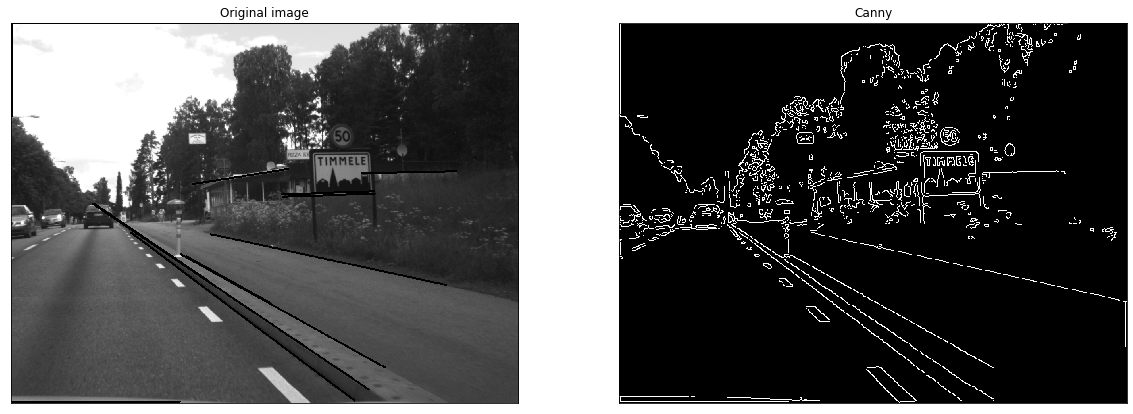

In [16]:
#Hough 

minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,np.array([]),minLineLength,maxLineGap)
for l in lines:
    for x1,y1,x2,y2 in l:
        cv2.line(img,(2*x1,2*y1),(2*x2,2*y2),(0,255,0),3)



tools.multiPlot( 1, 2, ( img, edges),
                     ( 'Original image', 'Canny'),
                     cmap_tuple=( cm.gray, cm.gray))


In [17]:
def update( minLineLength=80, maxLineGap=10):
    img = cv2.imread( 'Images/Road.png', cv2.IMREAD_GRAYSCALE)
    lines = cv2.HoughLinesP(edges,1,np.pi/180,100,np.array([]),minLineLength,maxLineGap)
    for l in lines:
        for x1,y1,x2,y2 in l:
            cv2.line(img,(2*x1,2*y1),(2*x2,2*y2),(0,255,0),3)

    tools.multiPlot( 1, 2, ( img, edges),
                     ( 'Original image', 'Canny'),
                     cmap_tuple=( cm.gray, cm.gray))

interact(update, minLineLength = (50, 150, 10), hi_thresh = (10, 50, 5))

interactive(children=(IntSlider(value=80, description='minLineLength', max=150, min=50, step=10), IntSlider(va…

<function __main__.update(minLineLength=80, maxLineGap=10)>